<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

Perform exploratory data analysis on the netflix_data.csv data to understand more about movies from the 1990s decade.

* What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration.
* A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
df = pd.read_csv("netflix_data.csv")

## Understanding the Data
## 1. Check data information
It is crucial to check the information in your dataset before analysis. This is especially important when dealing with mixed data types (numbers and text), as it can lead to unexpected results. By examining the data, you can also gain a better understanding of its structure.

Display the first five(5) rows.

In [3]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


First 5 rows of Netflix Movies Data Set

In [4]:
df.shape

(4812, 11)

Data Set has 4812 rows and 11 columns

In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

Shows the Data type of the existing columns

print(df.info()) provides a quick overview of the DataFrame by displaying the data types of each column, how many entries (rows) it has, and any missing values. This helps you understand the structure of your data and identify potential issues before analysis.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None


More detailed information of the DataFrame

## 2. Check duplicated rows
It’s essential to check for and remove duplicate rows in the DataFrame to ensure data integrity. Duplicates can skew our analysis by giving undue weight to certain data points and lead to biased results.

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


No detected duplicate rows

## 3. Check null values
Checking missing values is essential for data cleaning. It ensures data integrity and avoids biases that can skew our analysis.

Check for null values.

No null values were present in all columns

In [9]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64


We can also use df.count(),it is a useful for counting the number of non-null values in each column of a DataFrame. It returns a Series containing the counts.

All columns have the same counts of non-null values, this shows that there is specific column without an entry or data.

In [8]:
df.count() 

show_id         4812
type            4812
title           4812
director        4812
cast            4812
country         4812
date_added      4812
release_year    4812
duration        4812
description     4812
genre           4812
dtype: int64

DataFrame’s existing columns and no. of non-null values

## 4. Identify Data Patterns
Summarizes key statistics for numerical data in our DataFrame. This helps understand data patterns and prepare for further analysis.

In [10]:
df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


Statistics of the release_year and duration columns

In [11]:
print(df.value_counts('type'))

type
Movie      4677
TV Show     135
Name: count, dtype: int64


Data counts per type

The “Type” column has two categories: “Movie” and “TV Show”. “Movie” has 4,677 entries, while “TV Show” has 135, for a total of 4,812 rows.

Another way to count “Movies”

In [12]:
df_subset = df[df['type'] == "Movie"]
print(df_subset.value_counts('type'))

type
Movie    4677
Name: count, dtype: int64


Movies has 4677 entires

## Question No. 1
## What was the most frequent movie duration in the 1990s?
* Save an approximate answer as an integer called duration.

Create a new DataFrame which is Netflix “Movie” films released from year 1990 to 1999.

In [13]:
new_df = df[(df['release_year'] >= 1990) & (df['release_year'] < 2000) & (df['type'] == "Movie")]
print(new_df.value_counts('type'))

type
Movie    183
Name: count, dtype: int64


183 counts of Movies Released on Year 1990–1999

Modify DataFrame with chosen columns display.

In [14]:
keep=['title','country','genre','release_year','duration']
netflix_movies = new_df[keep]
print(netflix_movies.columns)

Index(['title', 'country', 'genre', 'release_year', 'duration'], dtype='object')


Plot histogram to visualize the data according to number of movies and duration.

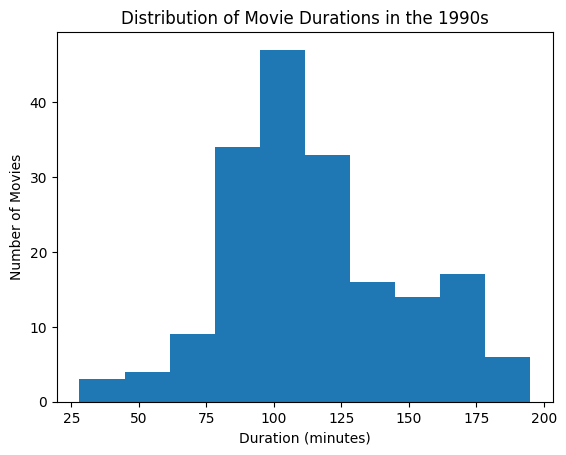

In [15]:
plt.hist(netflix_movies["duration"])
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

As shown in the graph above, the most frequent movie duration in the 1990s is 100 minutes.

In [16]:
duration = 100

## Question No. 2
##  Count the number of short action movies released in the 1990s
* A movie is considered short if it is less than 90 minutes.
* Save this integer as short_movie_count.

Create a new DataFrame for Netflix movies which genre is in “Action” category.

In [17]:
action_movies_1990s = netflix_movies[netflix_movies["genre"] == "Action"]
print(action_movies_1990s.value_counts('genre'))

genre
Action    48
Name: count, dtype: int64


48 Action Movies were counted

Create a new DataFrame for Netflix movies which duration is less than 90 minutes.

In [18]:
short_action_movies_1990s = action_movies_1990s[action_movies_1990s["duration"] <90 ]
print(short_action_movies_1990s.value_counts('duration'))

duration
89    2
69    1
83    1
84    1
87    1
88    1
Name: count, dtype: int64


Movie counts according to durations

Count the number of short action movies released in the 1990s.

Option 1

In [19]:
short_movie_count = 0

for label, row in action_movies_1990s.iterrows() :
    if row["duration"] < 90 :
        short_movie_count = short_movie_count + 1
    else:
        short_movie_count = short_movie_count

print(short_movie_count)

7


Option 2

In [20]:
(action_movies_1990s["duration"] < 90).sum()

7

### There are 7 Short Action Movies released in the 1990s